In [1]:
import numpy as np
import pygmt
import pandas as pd

df1 = pd.read_csv(r".\data\Oceanography.txt", sep='\t')
df2 = pd.read_csv(r".\data\Multidisciplinary.txt", sep='\t')
df3 = pd.read_csv(r".\data\RemoteSensing.txt", sep='\t')
df4 = pd.read_csv(r".\data\Geophysics.txt", sep='\t')
df5 = pd.read_csv(r".\data\Imaging.txt", sep='\t')
df6 = pd.read_csv(r".\data\Meteorology.txt", sep='\t')
df7 = pd.read_csv(r".\data\Environmental.txt", sep='\t')
df8 = pd.read_csv(r".\data\EngineeringElectrical.txt", sep='\t')
df9 = pd.read_csv(r".\data\GeographyPhysical.txt", sep='\t')
df10 = pd.read_csv(r".\data\EngineeringAerospace.txt", sep='\t')


In [5]:
df1

,Publication Years,Record Count,"% of 2,575"
0,2015,150,5.825
1,2020,137,5.320
2,2016,136,5.282
3,2021,134,5.204
4,2004,132,5.126
5,2019,129,5.010
6,2010,123,4.777
7,2012,119,4.621
8,2018,116,4.505
9,2014,113,4.388


In [95]:
names=["Oceanography","Geosciences Multidisciplinary","Remote Sensing","Geochemistry Geophysics","Imaging Science Photographic Technology",
      "Meteorology Atmospheric Sciences","Environmental Science","Engineering Electrical Electronic","Geography Physical","Engineering Aerospace"]
print(type(names))
names[2]

<class 'list'>


'Remote Sensing'

In [70]:
print(type(df1))
# df1.orderBy("Publication Years").show()
data=df1.sort_values(by='Publication Years',ascending=True,axis=0)
data["Publication Years"].values

<class 'pandas.core.frame.DataFrame'>


array([1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990,
       1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001,
       2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012,
       2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021], dtype=int64)

In [57]:
a=range(10)
print(type(a))
# print(df1)
r=random.randint(0,255)
print(type(str(r)))

<class 'range'>
<class 'str'>


0
3p,136/162/79
1
3p,203/175/238
2
3p,214/70/196
3
3p,105/84/232
4
3p,184/241/174
5
3p,48/249/177
6
3p,29/94/129
7
3p,120/160/212
8
3p,90/110/186
9
3p,92/221/45


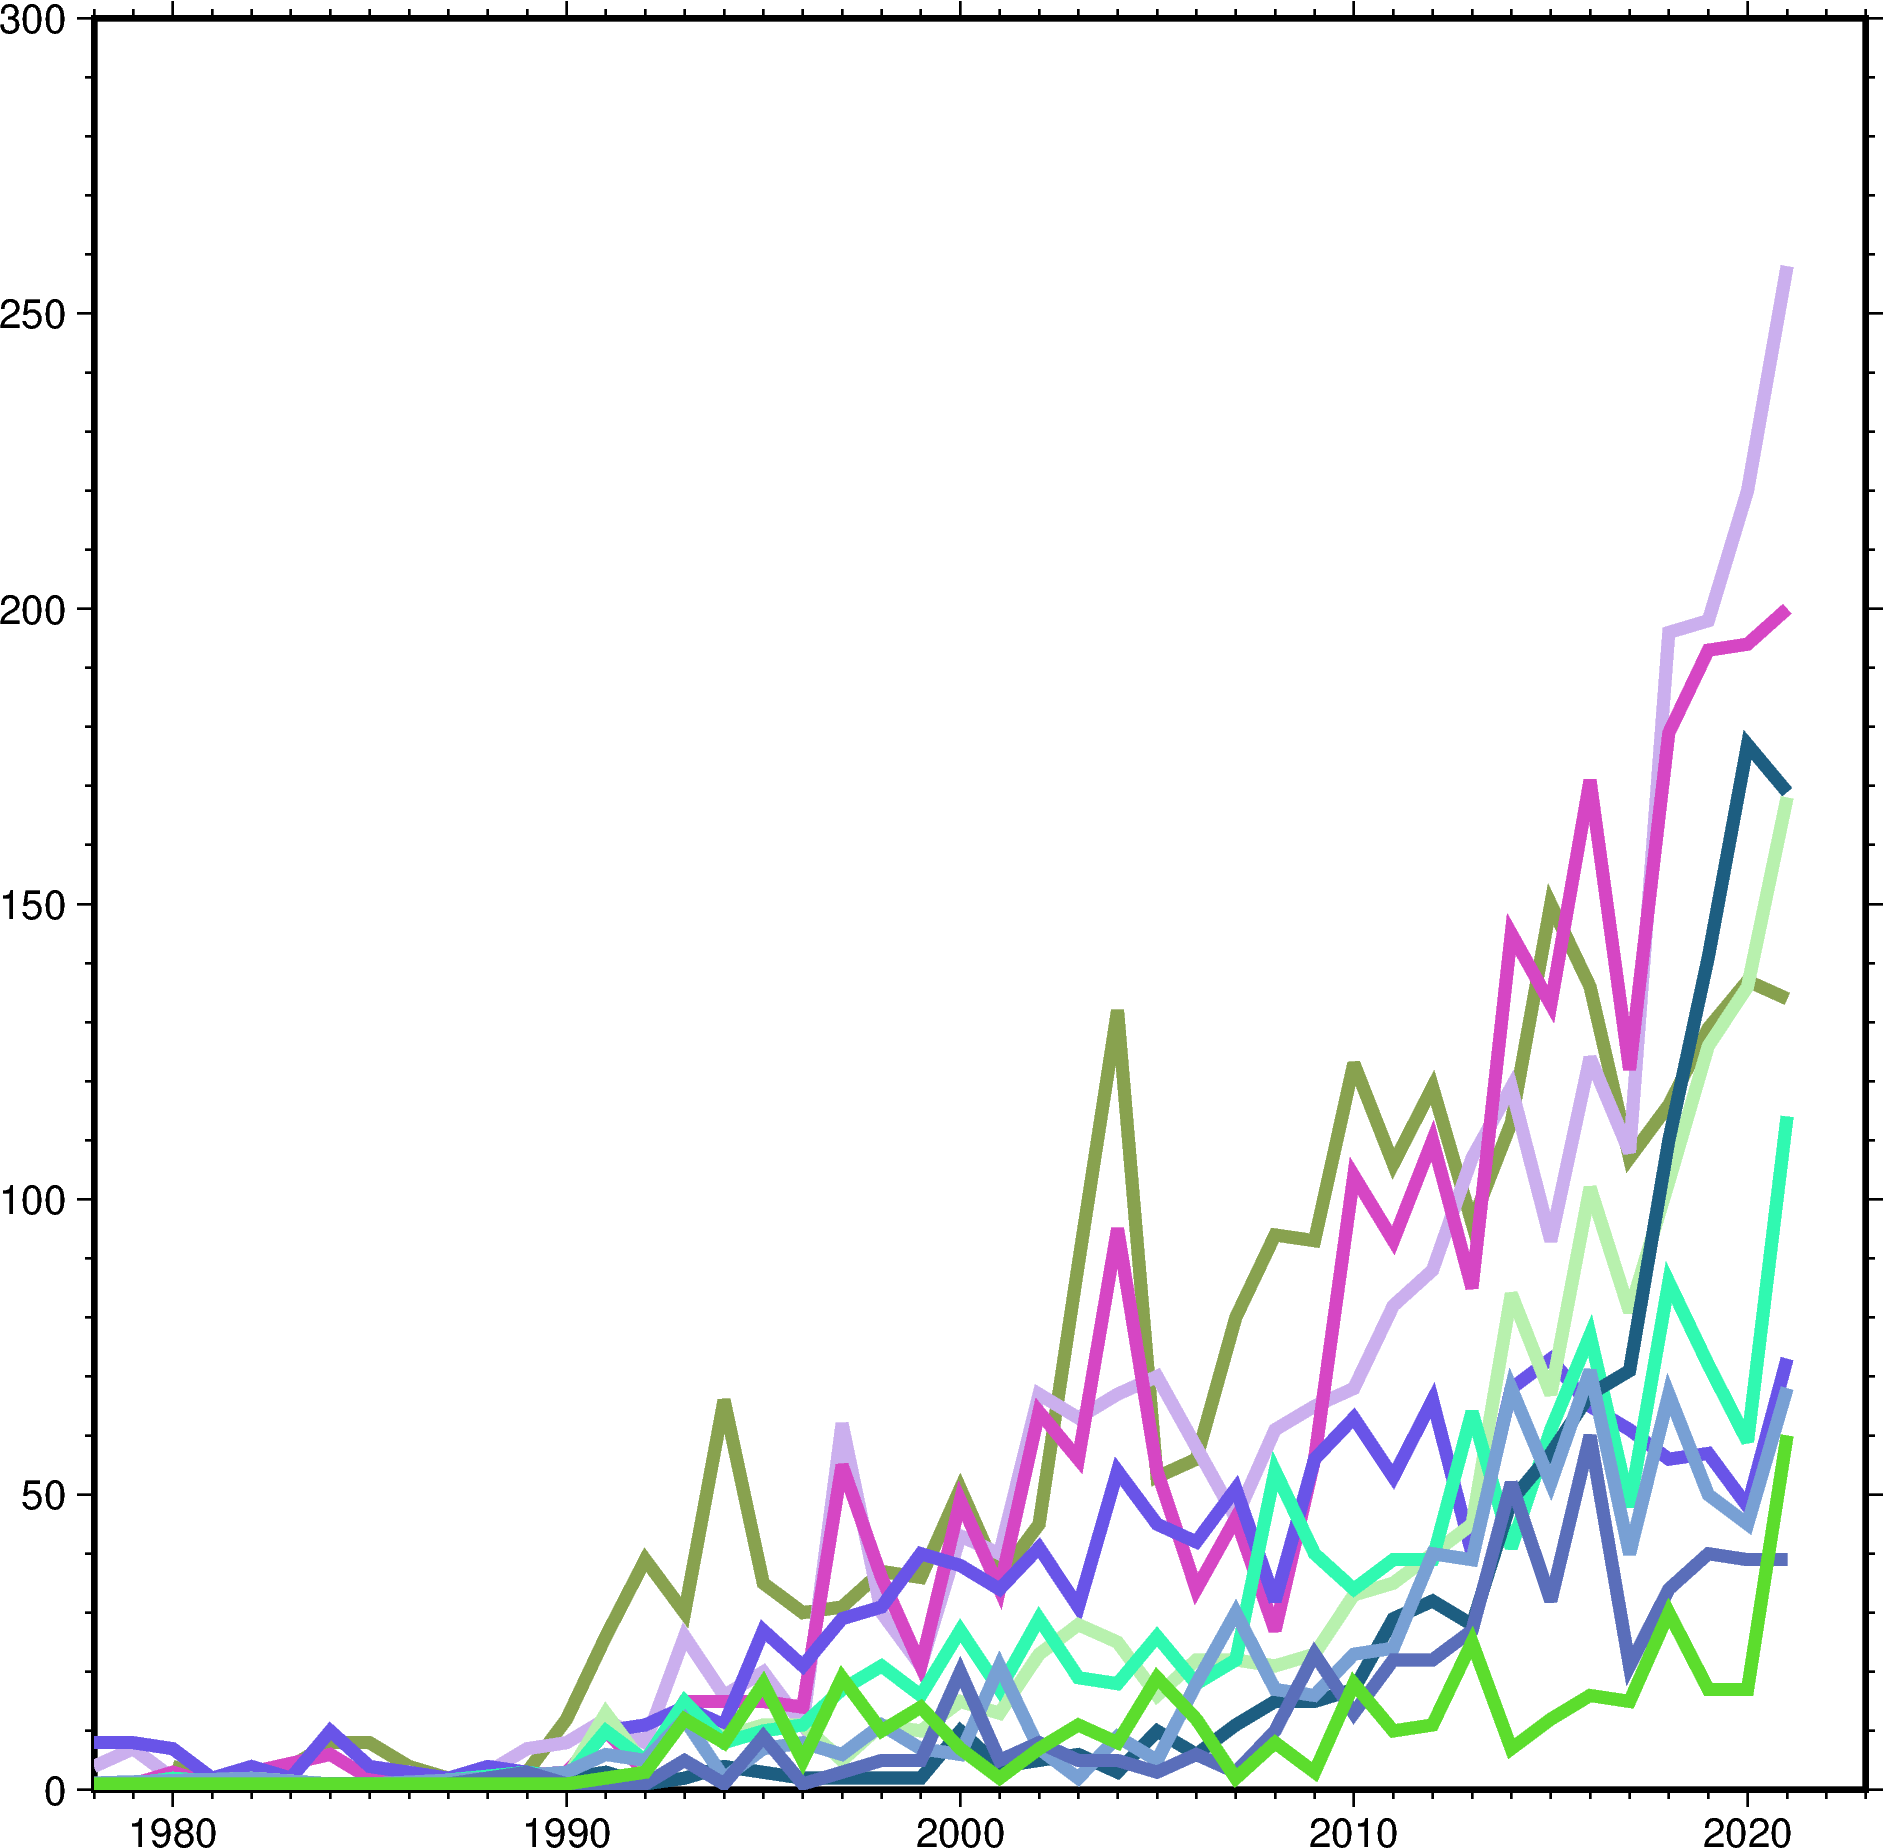

In [64]:
import random
fig = pygmt.Figure()
fig.basemap(region=[1978, 2023, 0, 300], projection="X15c/15c", frame=["SnWelr", "xaf1","yaf10"])

for index in range(10):
    print(index)
    data=eval("df"+str(np.array(index+1)))
    r=str(random.randint(0,255))
    g=str(random.randint(0,255))
    b=str(random.randint(0,255))
    pen="3p,"+r+"/"+g+"/"+b
    
    print(pen)
    fig.plot(data=data.sort_values(by='Publication Years',ascending=True,axis=0), pen=pen)

fig.show()


In [65]:
fig.savefig("cats.pdf")

9
8
7
6
5
4
3
2
1
0


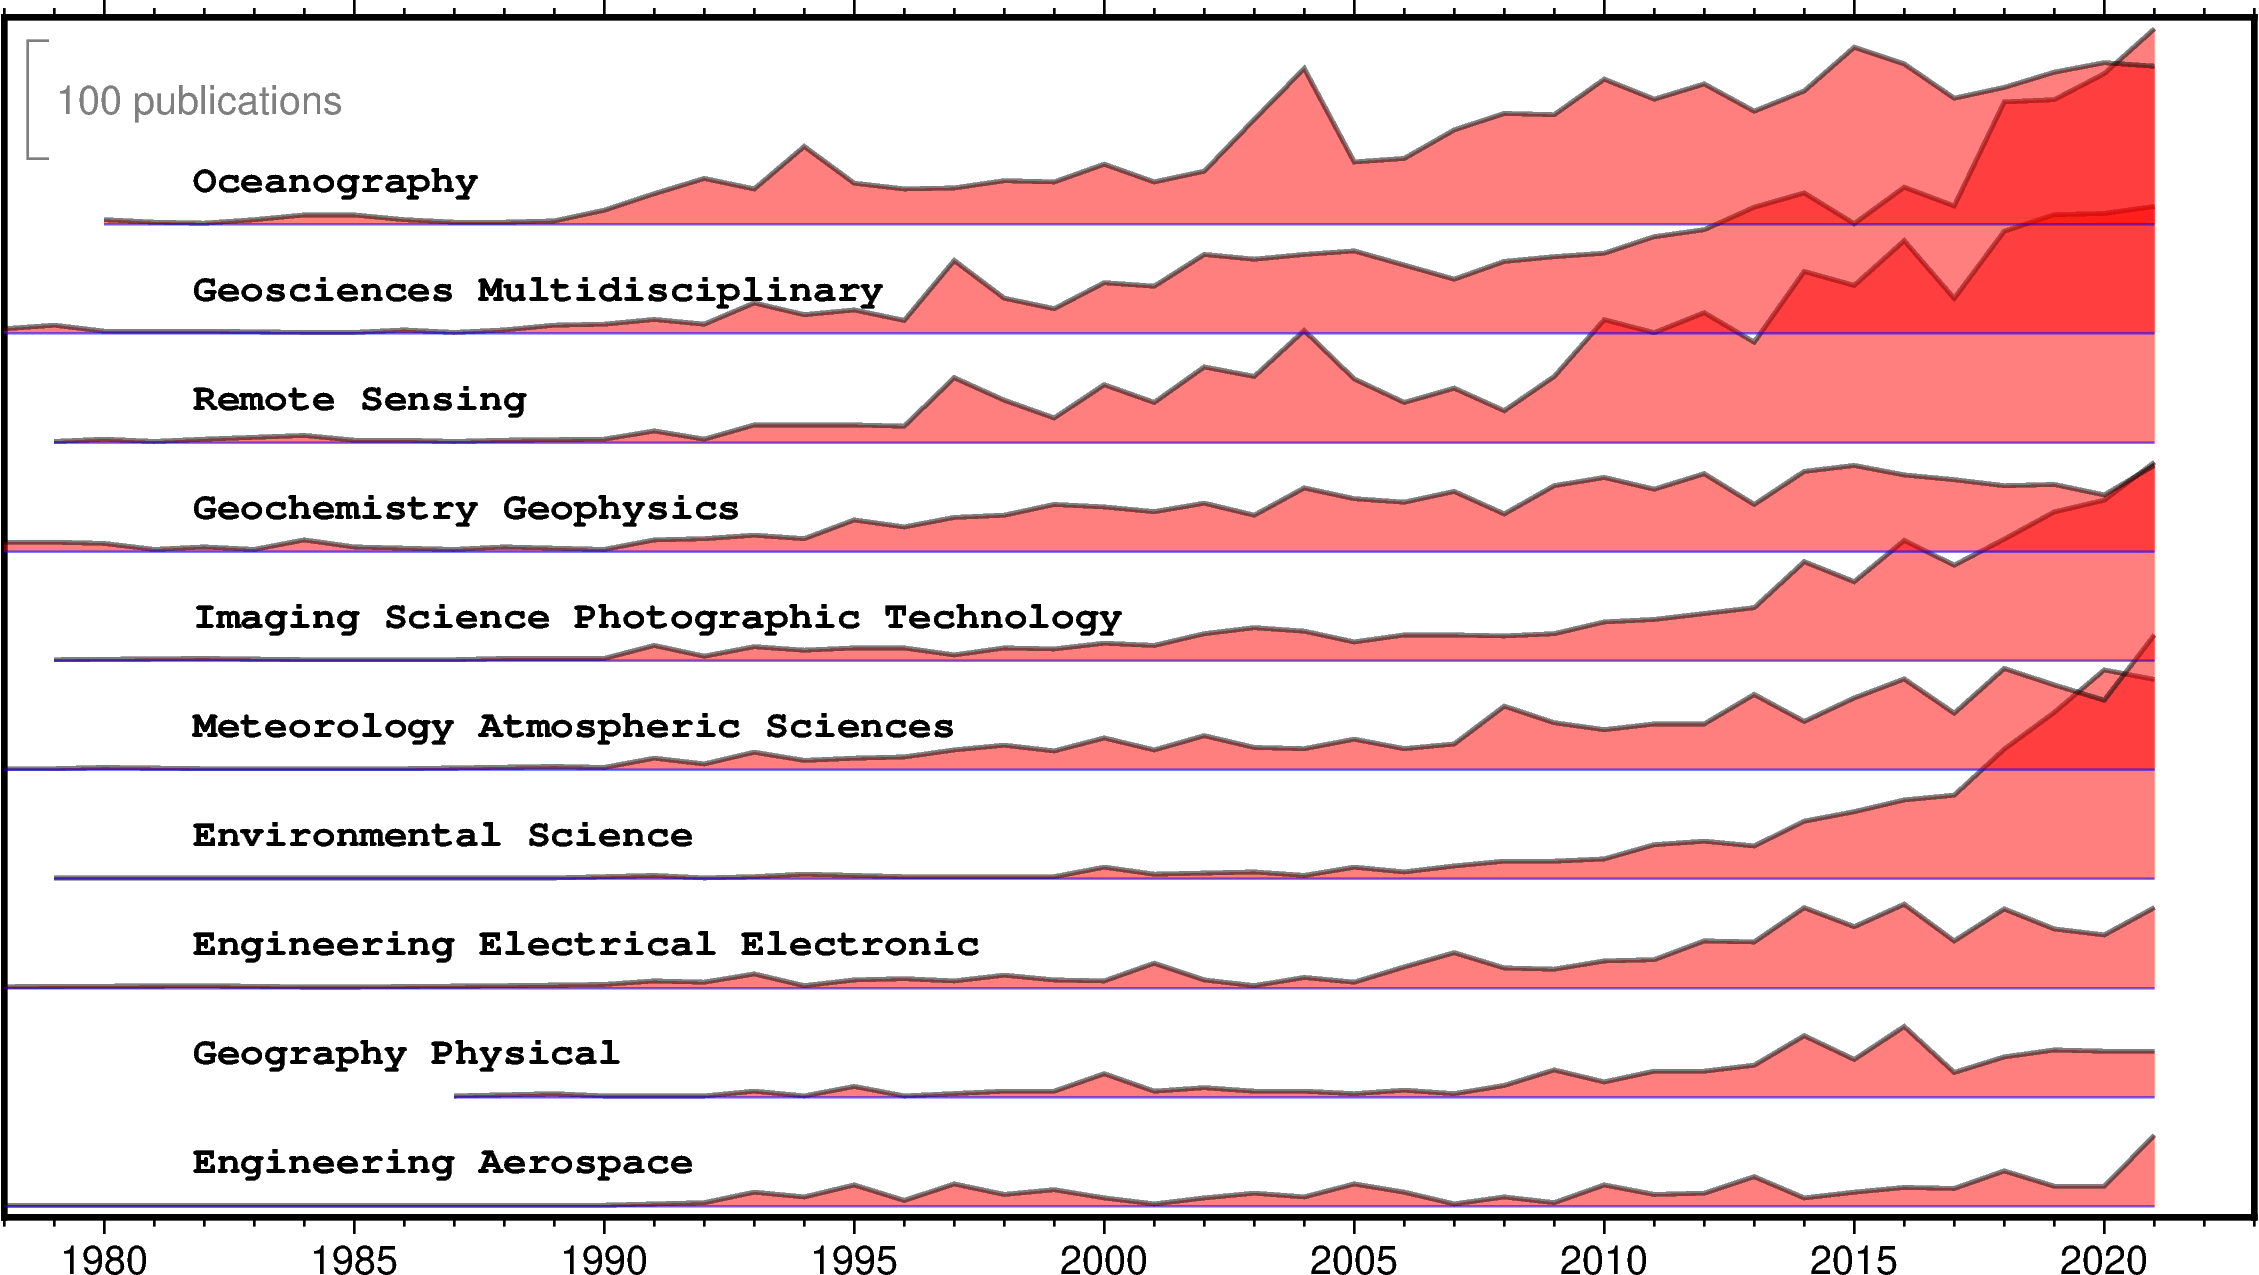

In [105]:

fig = pygmt.Figure()
fig.basemap(region=[1978, 2023, -10,100], projection="X7.5i/4i", frame=["Snlr", "xaf1"])

k=-10
for index in reversed(range(10)):
    print(index)
    data=eval("df"+str(np.array(index+1))).sort_values(by='Publication Years',ascending=True,axis=0)
    
    # print ('Present author : %s' % fruits[index])
    x=data["Publication Years"]
    z=data["Record Count"]
    # x=df['year'][df['Author']== fruits[index]]
    y=np.ones(x.values.size)+k
    k=k+10

    if k == 0:
        fig.wiggle(
            x=x.values,
            y=y,
            z=z.values,

            # Set anomaly scale to "20c"
            scale="100",
            # Fill positive and negative areas red and gray, respectively
            color=["red+p", "gray+n"],
            # Set the outline width to "1.0p"
            pen="1.0p",
            # Draw a blue track with a width of 0.5 points
            track="0.5p,blue",
            # Plot a vertical scale bar at the right middle. The bar length is 100 in
            # data (z) units. Set the z unit label to "nT".
            position="jLT+w100+lpublications+o0.2/0.2",
            transparency=50,
        )
    else:
        fig.wiggle(
            x=x.values,
            y=y,
            z=z.values,

            # Set anomaly scale to "20c"
            scale="100",
            # Fill positive and negative areas red and gray, respectively
            color=["red+p", "gray+n"],
            # Set the outline width to "1.0p"
            pen="1.0p",
            # Draw a blue track with a width of 0.5 points
            track="0.5p,blue",
            # Plot a vertical scale bar at the right middle. The bar length is 100 in
            # data (z) units. Set the z unit label to "nT".
            # position="jLT+w10+lpublications+o0.2/0.2",
            transparency=50,
        )
k=-10
for index in reversed(range(10)):

    k=k+10

    fig.text(
        region=[1978, 2023, -10, 100],
        projection="X7.5i/4i",
        x=1980,
        y=1+k-7,
        text=names[index],
        font="Courier-Bold",
        justify="BL",
        offset="0.75c/0c",
    )
    
fig.show()        

In [106]:
fig.savefig("cats2.pdf")